In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import nan

C:\ProgramData\Anaconda3\envs\tens_2\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [36]:
data=pd.read_csv('data/powerconsumption.csv')
data.head()

,Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3
0,16/12/2006;17:24:00;4.216;0.418;234.840;18.400...
1,16/12/2006;17:25:00;5.360;0.436;233.630;23.000...
2,16/12/2006;17:26:00;5.374;0.498;233.290;23.000...
3,16/12/2006;17:27:00;5.388;0.502;233.740;23.000...
4,16/12/2006;17:28:00;3.666;0.528;235.680;15.800...


In [37]:
data=pd.read_csv('data/powerconsumption.csv',sep=';',parse_dates=True,low_memory=False)
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [38]:
data['date_time']=data['Date'].str.cat(data['Time'],sep=' ')
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,16/12/2006 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,16/12/2006 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,16/12/2006 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,16/12/2006 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,16/12/2006 17:28:00


In [39]:
data.drop(['Date','Time'],axis=1,inplace=True)
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0,16/12/2006 17:24:00
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0,16/12/2006 17:25:00
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0,16/12/2006 17:26:00
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0,16/12/2006 17:27:00
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0,16/12/2006 17:28:00


In [40]:
data.set_index(['date_time'],inplace=True)
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
16/12/2006 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
16/12/2006 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
16/12/2006 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
16/12/2006 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
16/12/2006 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2075259 entries, 16/12/2006 17:24:00 to 26/11/2010 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    object 
 1   Global_reactive_power  object 
 2   Voltage                object 
 3   Global_intensity       object 
 4   Sub_metering_1         object 
 5   Sub_metering_2         object 
 6   Sub_metering_3         float64
dtypes: float64(1), object(6)
memory usage: 126.7+ MB


In [43]:
data.isnull().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [44]:
data.replace('?',nan,inplace=True)

In [45]:
data.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [46]:
data=data.astype('float')

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2075259 entries, 16/12/2006 17:24:00 to 26/11/2010 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7+ MB


In [48]:
data.shape

(2075259, 7)

In [51]:
np.isnan(data).sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [52]:
#null 값은 1일전 같은 시간 데이터로 채움
def fill_missing(data):
    one_day=24*60
    for row in range(data.shape[0]):
        for col in range(data.shape[1]):
            if np.isnan(data[row,col]):
                data[row,col]=data[row-one_day,col]

In [53]:
fill_missing(data.values)

In [54]:
np.isnan(data).sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [56]:
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.089418e+00,1.236871e-01,2.408364e+02,4.618401e+00,1.118474e+00,1.291131e+00,6.448635e+00
std,1.054678e+00,1.125933e-01,3.240051e+00,4.433165e+00,6.141460e+00,5.796922e+00,8.433584e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410000e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.526000e+00,1.940000e-01,2.428700e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


### prepare data of power consumption of each day

In [58]:
data.to_csv('data/powerconsumtion_cleaned.csv')

In [60]:
dataset=pd.read_csv('data/powerconsumtion_cleaned.csv',parse_dates=True,index_col='date_time',low_memory=False)

In [61]:
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


### let's do EDA(exploratory data analysis)

In [62]:
data=dataset.resample('D').sum()

In [63]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


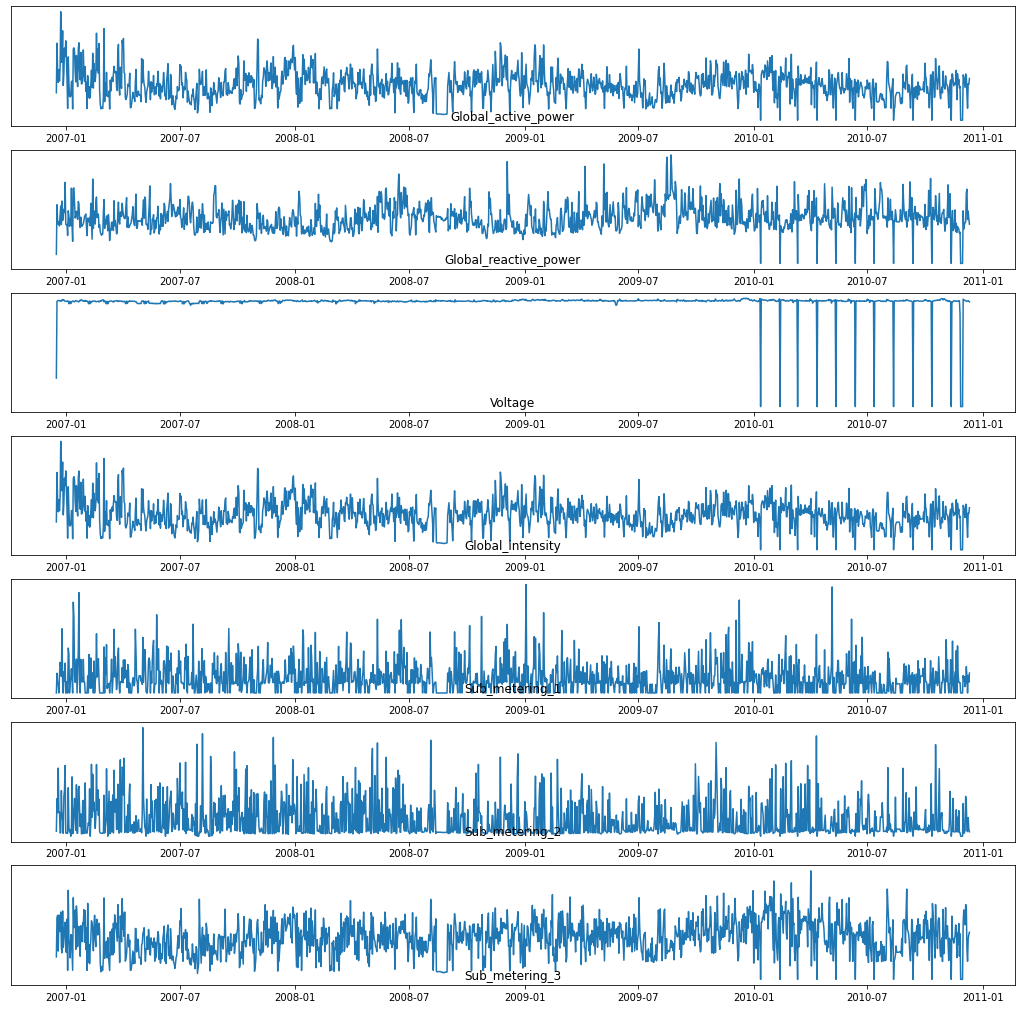

In [65]:
fig,ax=plt.subplots(figsize=(18,18))
for i in range(len(data.columns)):
    plt.subplot(len(data.columns),1,i+1)
    name=data.columns[i]
    plt.plot(data[name])
    plt.title(name,y=0)
    plt.yticks([])
plt.show()
fig.tight_layout()

### exploring  Global active power consumption for each year

In [66]:
years=['2007','2008','2009','2010']

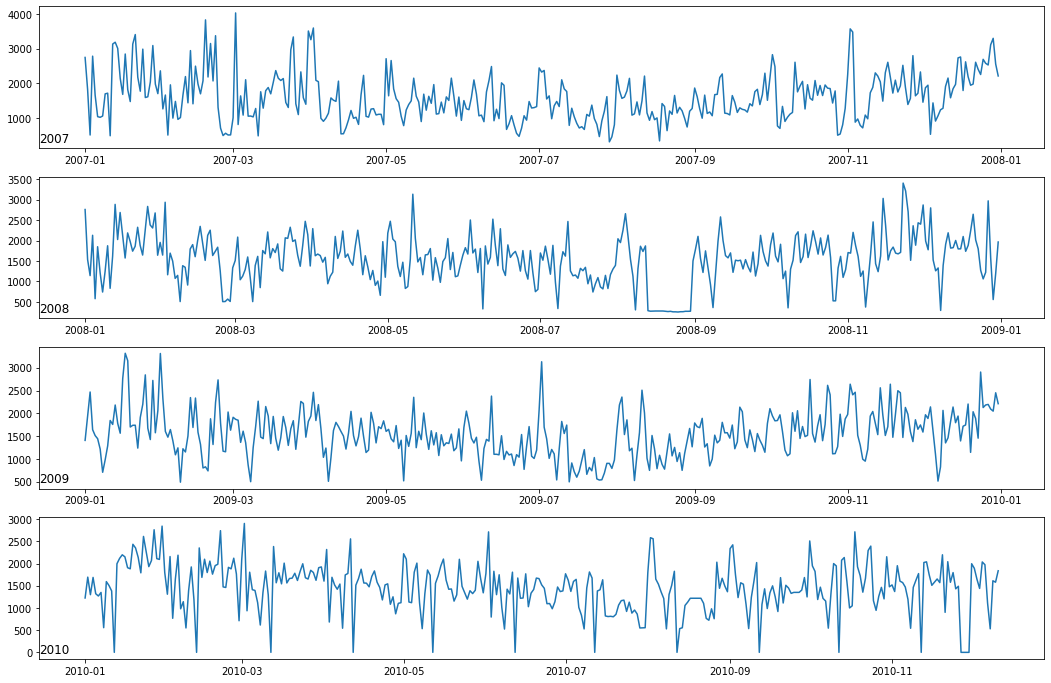

In [72]:
fig,ax=plt.subplots(figsize=(18,12))
for i in range(len(years)):
    plt.subplot(len(years),1,i+1)
    year=years[i]
    active_power_data=data[str(year)]
    plt.plot(active_power_data['Global_active_power'])
    plt.title(str(year),y=0,loc='left')
plt.show()
fig.tight_layout()

### power consumption distribution with histogram

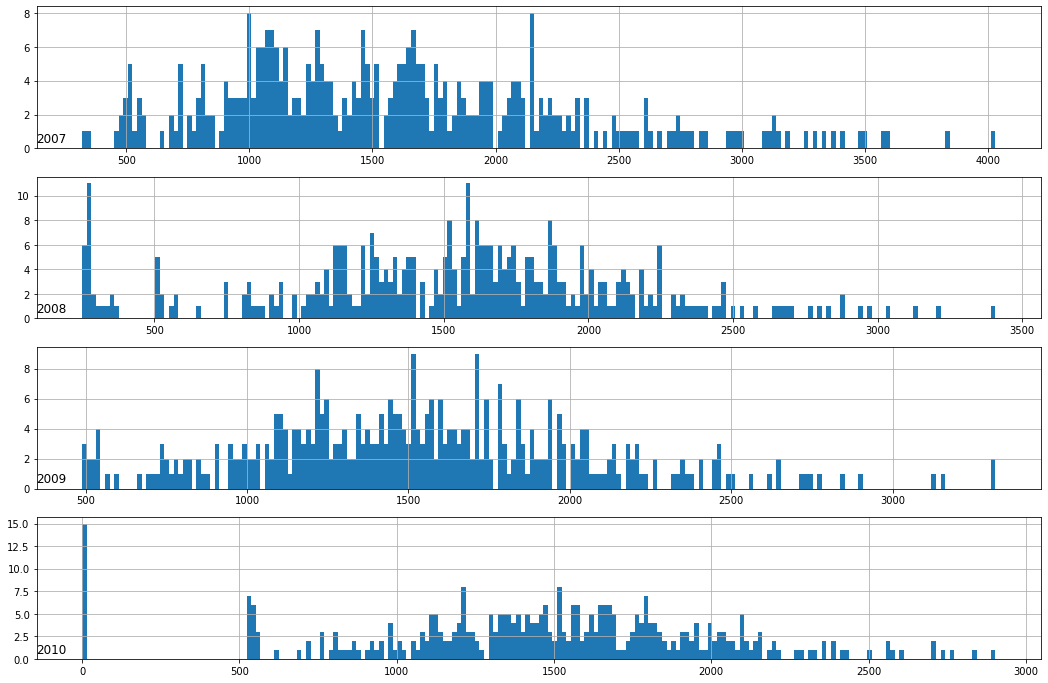

In [73]:
fig,ax=plt.subplots(figsize=(18,12))
for i in range(len(years)):
    plt.subplot(len(years),1,i+1)
    year=years[i]
    active_power_data=data[str(year)]
    active_power_data['Global_active_power'].hist(bins=200)
    plt.title(str(year),y=0,loc='left')
plt.show()
fig.tight_layout()

### Active power uses prediction

### problem framing

In [ ]:
Given recent power consumption, what is the expected power consumption for the week ahead?

This requires that a predictive model forecast the total active power for each day ober the next seven days.

A model of this tupe could be helpful within the household in planning expenditures. It could also be helpful on the supply side for planning elextricity demand for a specific household

Input -> Predict
[week1] -> [week2]
[week2] -> [week3]
[week3] -> [week4]

In [85]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [86]:
data.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2010-12-07,1109.574,285.912,345914.85,4892.0,1724.0,646.0,6444.0
2010-12-08,529.698,169.098,346744.70,2338.2,0.0,514.0,3982.0
2010-12-09,1612.092,201.358,347932.40,6848.2,1805.0,2080.0,8891.0
2010-12-10,1579.692,170.268,345975.37,6741.2,1104.0,780.0,9812.0
2010-12-11,1836.822,151.144,343926.57,7826.2,2054.0,489.0,10308.0


In [92]:
data_train=data.loc[:'2009-12-31',:]['Global_active_power']
data_train

date_time
2006-12-16    1209.176
2006-12-17    3390.460
2006-12-18    2203.826
2006-12-19    1666.194
2006-12-20    2225.748
                ...   
2009-12-27    2195.452
2009-12-28    2094.098
2009-12-29    2047.968
2009-12-30    2451.110
2009-12-31    2211.892
Freq: D, Name: Global_active_power, Length: 1112, dtype: float64

In [93]:
data_test=data['2010']['Global_active_power']
data_test

date_time
2010-01-01    1224.252
2010-01-02    1693.778
2010-01-03    1298.728
2010-01-04    1687.440
2010-01-05    1320.158
                ...   
2010-12-07    1109.574
2010-12-08     529.698
2010-12-09    1612.092
2010-12-10    1579.692
2010-12-11    1836.822
Freq: D, Name: Global_active_power, Length: 345, dtype: float64

### prepare training data : 7일간 데이터로 다음 7일 예측

In [94]:
data_train=np.array(data_train)

In [95]:
x_train,y_train=[],[]

for i in range(7,len(data_train)-7):
    x_train.append(data_train[i-7:i])
    y_train.append(data_train[i:i+7])

In [96]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [97]:
x_train.shape, y_train.shape

((1098, 7), (1098, 7))

In [98]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6
0,1209.176,3390.460,2203.826,1666.194,2225.748,1723.288,2341.338
1,3390.460,2203.826,1666.194,2225.748,1723.288,2341.338,4773.386
2,2203.826,1666.194,2225.748,1723.288,2341.338,4773.386,2550.012
3,1666.194,2225.748,1723.288,2341.338,4773.386,2550.012,2743.120
4,2225.748,1723.288,2341.338,4773.386,2550.012,2743.120,3934.110
...,...,...,...,...,...,...,...
1093,2138.814,1794.862,1940.116,1394.874,1717.182,1744.706,2204.334
1094,1794.862,1940.116,1394.874,1717.182,1744.706,2204.334,1144.166
1095,1940.116,1394.874,1717.182,1744.706,2204.334,1144.166,2034.966
1096,1394.874,1717.182,1744.706,2204.334,1144.166,2034.966,1888.022


In [99]:
x_scaler=MinMaxScaler()
x_std=x_scaler.fit_transform(x_train)

In [100]:
y_scaler=MinMaxScaler()
y_std=y_scaler.fit_transform(y_train)

In [101]:
pd.DataFrame(x_std)

,0,1,2,3,4,5,6
0,0.211996,0.694252,0.431901,0.313037,0.436748,0.325660,0.462304
1,0.694252,0.431901,0.313037,0.436748,0.325660,0.462304,1.000000
2,0.431901,0.313037,0.436748,0.325660,0.462304,1.000000,0.508439
3,0.313037,0.436748,0.325660,0.462304,1.000000,0.508439,0.551133
4,0.436748,0.325660,0.462304,1.000000,0.508439,0.551133,0.814446
...,...,...,...,...,...,...,...
1093,0.417528,0.341484,0.373598,0.253052,0.324310,0.330396,0.432014
1094,0.341484,0.373598,0.253052,0.324310,0.330396,0.432014,0.197623
1095,0.373598,0.253052,0.324310,0.330396,0.432014,0.197623,0.394568
1096,0.253052,0.324310,0.330396,0.432014,0.197623,0.394568,0.362081


In [102]:
x_std=x_std.reshape(1098,7,1)

### build LSTM model

In [103]:
model=Sequential()
model.add(LSTM(units=200,activation='relu',input_shape=(7,1)))
model.add(Dense(7))

In [104]:
model.compile(loss='mse',optimizer='adam')

In [105]:
model.fit(x_std,y_std,epochs=100)

Train on 1098 samples
Epoch 1/100
1098/1098 [==============================] - 2s 2ms/sample - loss: 0.0634
Epoch 2/100
1098/1098 [==============================] - 1s 459us/sample - loss: 0.0244
Epoch 3/100
1098/1098 [==============================] - 0s 408us/sample - loss: 0.0240
Epoch 4/100
1098/1098 [==============================] - 1s 476us/sample - loss: 0.0240
Epoch 5/100
1098/1098 [==============================] - 0s 416us/sample - loss: 0.0239
Epoch 6/100
1098/1098 [==============================] - 1s 507us/sample - loss: 0.0242
Epoch 7/100
1098/1098 [==============================] - 0s 398us/sample - loss: 0.0238
Epoch 8/100
1098/1098 [==============================] - 1s 458us/sample - loss: 0.0238
Epoch 9/100
1098/1098 [==============================] - 1s 480us/sample - loss: 0.0236
Epoch 10/100
1098/1098 [==============================] - 1s 598us/sample - loss: 0.0236
Epoch 11/100
1098/1098 [==============================] - 1s 547us/sample - loss: 0.0238
Epoch 12/1

1098/1098 [==============================] - 0s 448us/sample - loss: 0.0229
Epoch 93/100
1098/1098 [==============================] - 1s 533us/sample - loss: 0.0228
Epoch 94/100
1098/1098 [==============================] - 0s 453us/sample - loss: 0.0231
Epoch 95/100
1098/1098 [==============================] - 0s 451us/sample - loss: 0.0228s - loss: 0.0
Epoch 96/100
1098/1098 [==============================] - 0s 439us/sample - loss: 0.0229
Epoch 97/100
1098/1098 [==============================] - 1s 497us/sample - loss: 0.0228
Epoch 98/100
1098/1098 [==============================] - 0s 419us/sample - loss: 0.0228
Epoch 99/100
1098/1098 [==============================] - 1s 467us/sample - loss: 0.0230
Epoch 100/100
1098/1098 [==============================] - 1s 484us/sample - loss: 0.0228


### prepare test dataset and test LSTM model

In [106]:
data_test

date_time
2010-01-01    1224.252
2010-01-02    1693.778
2010-01-03    1298.728
2010-01-04    1687.440
2010-01-05    1320.158
                ...   
2010-12-07    1109.574
2010-12-08     529.698
2010-12-09    1612.092
2010-12-10    1579.692
2010-12-11    1836.822
Freq: D, Name: Global_active_power, Length: 345, dtype: float64

In [107]:
data_test=np.array(data_test)

In [109]:
x_test,y_test=[],[]

for i in range(7,len(data_test)-7):
    x_test.append(data_test[i-7:i])
    y_test.append(data_test[i:i+7])

In [111]:
x_test,y_test=np.array(x_test),np.array(y_test)

In [129]:
y_test

array([[ 555.664, 1593.318, 1504.82 , ...,    0.   , 1995.796, 2116.224],
       [1593.318, 1504.82 , 1383.18 , ..., 1995.796, 2116.224, 2196.76 ],
       [1504.82 , 1383.18 ,    0.   , ..., 2116.224, 2196.76 , 2150.112],
       ...,
       [1892.998, 1645.424, 1439.426, ..., 1973.382, 1109.574,  529.698],
       [1645.424, 1439.426, 2035.418, ..., 1109.574,  529.698, 1612.092],
       [1439.426, 2035.418, 1973.382, ...,  529.698, 1612.092, 1579.692]])

In [118]:
x_test_std=x_scaler.transform(x_test)
y_test_std=y_scaler.transform(y_test)

In [121]:
x_test_std.shape

(331, 7)

In [122]:
x_test_std=x_test_std.reshape(331,7,1)

In [125]:
y_pred_std=model.predict(x_test_std)

In [126]:
y_pred_std

array([[0.27122754, 0.32190418, 0.33983266, ..., 0.3445398 , 0.3333347 ,
        0.3438018 ],
       [0.1913186 , 0.26353404, 0.29887468, ..., 0.32389265, 0.32272136,
        0.32636487],
       [0.28395823, 0.326841  , 0.3448848 , ..., 0.3344505 , 0.31744793,
        0.33312345],
       ...,
       [0.11925022, 0.09058492, 0.14281356, ..., 0.08268149, 0.08074014,
        0.1331733 ],
       [0.30490965, 0.275753  , 0.276658  , ..., 0.18650922, 0.17470658,
        0.21440762],
       [0.319178  , 0.30825976, 0.29913214, ..., 0.22962934, 0.22441944,
        0.26645714]], dtype=float32)

In [127]:
y_pred=y_scaler.inverse_transform(y_pred)
y_pred

array([[1477.084  , 1466.9104 , 1534.6697 , ..., 1552.46   , 1510.1112 ,
        1549.6708 ],
       [1115.6489 , 1246.3048 , 1379.8721 , ..., 1474.4257 , 1469.9988 ,
        1483.7692 ],
       [1534.666  , 1485.5686 , 1553.7639 , ..., 1514.3282 , 1450.0682 ,
        1509.3127 ],
       ...,
       [ 789.67725,  592.6568 ,  790.051  , ...,  562.78644,  555.4492 ,
         753.6164 ],
       [1629.4312 , 1292.4855 , 1295.9059 , ...,  955.1954 ,  910.58826,
        1060.6353 ],
       [1693.968  , 1415.3423 , 1380.8451 , ..., 1118.1646 , 1098.4742 ,
        1257.3524 ]], dtype=float32)

In [128]:
y_true=y_scaler.inverse_transform(y_test_std)
y_true

array([[ 555.664, 1593.318, 1504.82 , ...,    0.   , 1995.796, 2116.224],
       [1593.318, 1504.82 , 1383.18 , ..., 1995.796, 2116.224, 2196.76 ],
       [1504.82 , 1383.18 ,    0.   , ..., 2116.224, 2196.76 , 2150.112],
       ...,
       [1892.998, 1645.424, 1439.426, ..., 1973.382, 1109.574,  529.698],
       [1645.424, 1439.426, 2035.418, ..., 1109.574,  529.698, 1612.092],
       [1439.426, 2035.418, 1973.382, ...,  529.698, 1612.092, 1579.692]])

In [142]:
y_true[:,0]

array([ 555.664, 1593.318, 1504.82 , 1383.18 ,    0.   , 1995.796,
       2116.224, 2196.76 , 2150.112, 1906.556, 1881.098, 2433.508,
       2351.728, 2137.856, 1790.626, 2610.33 , 2269.42 , 1930.51 ,
       2067.564, 2760.902, 2110.234, 2092.99 , 2842.728, 1799.196,
       1309.268, 2157.432,  766.906, 1648.622, 2187.91 ,  980.898,
       1140.928,  549.482, 1392.492, 1923.254, 1191.082,    0.   ,
       2351.556, 1688.294, 2097.132, 1797.756, 2054.56 , 1761.156,
       1953.572, 1983.728, 2740.314, 1474.036, 1461.28 , 1914.278,
       1880.204, 2120.156, 1765.056,  711.666, 2083.454, 2903.014,
        935.834, 1805.278, 1411.302, 1394.186, 1120.074,  615.212,
       1346.414, 1830.684, 1293.298,    0.   , 2383.01 , 1566.714,
       1791.85 , 1542.65 , 2009.13 , 1562.682, 1663.384, 1670.584,
       1781.146, 1618.59 , 1822.162, 1994.752, 1679.884, 1651.284,
       1847.97 , 1798.214, 1622.738, 1906.454, 1923.802, 1604.132,
       2316.27 ,  682.88 , 1690.388, 1516.96 , 1420.554, 1538.

In [144]:
y_true[0]

array([ 555.664, 1593.318, 1504.82 , 1383.18 ,    0.   , 1995.796,
       2116.224])

### evaluate the model

In [138]:
def evaluate_model(y_true,y_predicted):
    scores=[]
    
    #calculate scores for each day 요일별로 rmse 구함
    for i in range(y_true.shape[1]):
        mse=mean_squared_error(y_true[:,i],y_predicted[:,i])
        rmse=np.sqrt(mse)
        scores.append(rmse)
        
    #calculate score for whole predictoin
    total_score=0
    for row in range(y_true.shape[0]):
        for col in range(y_predicted.shape[1]):
            total_score=total_score+(y_true[row,col]-y_predicted[row,col])**2
    total_score=np.sqrt(total_score/(y_true.shape[0]*y_predicted.shape[1]))
    
    return total_score,scores

In [139]:
evaluate_model(y_true,y_pred)

(583.6203064034138,
 [593.1953406800482,
  596.3734340760591,
  584.62593765067,
  570.4013512819661,
  585.6413531238937,
  577.8201511456424,
  576.8444670548001])

In [143]:
np.std(y_true[0])

710.0253857243853